# Trajectory of an object "falling" from space

This notebook calculates (using numerical integration) and plots the trajectory of an object launched, with a given velocity (magnitude and direction), from a space station orbiting Earth in a circular orbit at a given altitude. At least that's the intended scenario that motivated this notebook, but it can easily be modified to calculate and plot the "falling" trajectory from any height and any initial velocity above any space mass.

Therefore, the input values should be the initial distance from the surface of the Earth (h_init), which is the height of the imagined space station's orbit, the launch speed of the object "ejected" from the space station (v_launch), and the angle of the launch velocity with respect to the space station's orbit direction (alpha_v).

Actually, the question that was the direct motivation for making this notebook was would a bullet fired directly at Earth from a rifle that was in geostationary orbit fall to Earth, or not? The answer is no, but suprisingly, if it were fired in a different (optimal) direction and if the initial velocity is just around the theoretical maximum for a rifle bullet, it just might... So have fun experimenting ;)

## How to use this notebook

One just has to change the variables in the next cell to desired values and then run all the cells sequentially, the trajectory will be shown at the bottom.

In [8]:
h_init = 35786 # distance from Earth, in km
v_launch = 1.5 # object launch speed relative to the "space station" in orbit, in km/s
alpha_v = -180 # angle of launch velocity with respect to orbit, in degrees (0 means tangential in direction of orbit, -90 means straight "down" towards Earth)

t_start = 0
t_end = 7*24*3600 #in seconds

In [9]:
%matplotlib notebook
#%matplotlib ipympl
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

G = 6.6743*10**(-20) # in km^3/(kg*s^2)
M = 5.972*10**24 # Earth mass in kg (change this if interested in falling to a different space body)
R = 6371 # Earth radius in km (same note as above)

def v_orbital(h):
    return np.sqrt(G*M/(R+h))

def ODEs(t, ins):
    r = ins[0]
    v_r = ins[1]
    phi = ins[2]
    v_t = ins[3]
    r_dot = v_r
    v_r_dot = v_t**2/r - G*M/r**2
    phi_dot = v_t/r
    v_t_dot = -v_t*v_r/r
    return np.array([r_dot, v_r_dot, phi_dot, v_t_dot])

In [10]:
v_orbit = v_orbital(h_init)
v_r0 = v_launch*np.sin(np.deg2rad(alpha_v))
v_t0 = v_orbit + v_launch*np.cos(np.deg2rad(alpha_v))
v0 = np.sqrt(v_r0**2 + v_t0**2)

initial = np.array([h_init+R, v_r0, 0, v_t0])

def end(t, ins):
    r = ins[0]
    return r-R # surface of the Earth
end.terminal = True
    
sol = scipy.integrate.solve_ivp(ODEs, (t_start, t_end), initial, events = end, max_step = 60)

ts = sol['t']
rs = sol['y'][0]
v_rs = sol['y'][1]
phis = sol['y'][2]
v_ts = sol['y'][3]

print(sol['message'])

A termination event occurred.


<IPython.core.display.Javascript object>


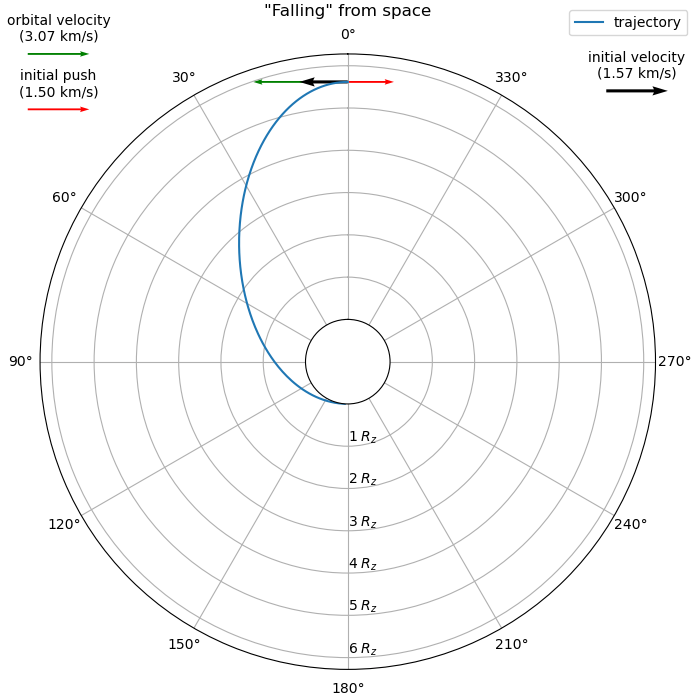

In [14]:
r_max = 1.1*np.max(rs)
scale = int(r_max/rs[0])

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection': 'polar'}, layout='constrained')
ax.set_title('"Falling" from space', va='bottom')

ax.plot(phis, rs, label='trajectory')
#line, = ax.plot(phis[0], rs[0], 'x', label='location at\nt = {:.0f} s'.format(ts[0]))
arrow1 = ax.quiver(phis[0], rs[0], -v_orbit, 0, scale=scale*20, width=0.003, color='green')
arrow2 = ax.quiver(phis[0], rs[0], -v_t0+v_orbit, v_r0, scale=scale*20, width=0.003, color='red')
arrow3 = ax.quiver(phis[0], rs[0], -v_t0, v_r0, scale=scale*20, width=0.005, color='black')

#TODO
# 1) add slider for time -> draw point at that point in time (with velocity vector)
# 2) add interactive input for initial height, speed and angle

ax.set_rmax(r_max)
ax.set_rmin(R)
ax.set_rorigin(0)
r_ticks = np.arange((scale+1)*R, r_max, scale*R)
ax.set_rticks(r_ticks, [r'${:d}\;R_z$'.format(int((r-R)/R)) for r in r_ticks])
ax.set_rlabel_position(180)
ax.set_xticks(np.pi/180 * np.linspace(0, 360, 12, endpoint=False))
#ax.set_thetalim(0, 2*np.pi)
ax.set_theta_zero_location("N")
ax.grid(True)
ax.legend(loc=(0.86,1.03))
ax.quiverkey(arrow3, 0.97, 0.94, 2, 'initial velocity\n({:.2f} km/s)'.format(v0), coordinates='axes')
ax.quiverkey(arrow1, 0.03, 1.00, 2, 'orbital velocity\n({:.2f} km/s)'.format(v_orbit), coordinates='axes')
ax.quiverkey(arrow2, 0.03, 0.91, 2, 'initial push\n({:.2f} km/s)'.format(v_launch), coordinates='axes')

#def update(t = 0):
#    line.set_xdata(phis[t])
#    line.set_ydata(rs[t])
#    arrow3.set_UVC(-v_ts[t], v_rs[t]) #TODO need to change position of vector...
#    fig.canvas.draw_idle()
#
#from ipywidgets import interact   
#x = interact(update, t = (0, len(ts)-1, 1));
plt.show()